# Discrete Random Variables

### In this notebook we introduce the concept of discrete random variables and explore PMFs (probability mass functions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import minimize

import warnings
warnings.filterwarnings("ignore")

# Part 1 - Expected Value and Variance

Let $X$ be a discrete random variable with the following PMF:

$$

p_X(x) =
    \begin{cases}
        \frac{\exp{(-x^2)}}{a} & \text{if } x = -3, -1, 0, 1, 2\\
        0 & otherwise
    \end{cases}

$$

### a) Find $a$, $E[X]$ and $\text{var}(X)$

We know that

$$\sum_k p_X(k) = 1$$

hence,

$$\sum_{k\in \{-3,-1,0,1,2\}} \frac{\exp{(-x^2)}}{a} = 1$$
$$a = 1 + 2e^{-1} + e^{-4} + e^{-9}$$
$$a \approx 1.7542$$

In [2]:
values_x = [-3, -1, 0, 1, 2]

def px(x):
    if x==-3 or x == -1 or x==0 or x==1 or x==2:
        resp = (1/1.7542)*np.exp(-x**2)
    else:
        resp = 0
    
    return resp

Expected Value

In [3]:
def expectedValue(values):
    resp = 0
    for val in values:
        resp += val*px(val)

    return resp

EX = expectedValue(values_x)

print(f'The expected value of X is {EX}')

The expected value of X is 0.020670988692970196


Variance

In [4]:
def variance(values):
    EXcuad = 0
    for val in values:
        EXcuad += (val**2)*px(val)
    
    resp = EXcuad - (EX)**2

    return resp

print(f'The variance of X is: {variance(values_x)}')

The variance of X is: 0.46139697549529646


### b) Find the PMF of the discrete random variable $Z = e^{-(X-E[X])^2}$

In [5]:
def Z(X):
    return np.exp(-(X-EX)**2)

In [6]:
values_z = []
pz = []

for val in values_x:
    values_z.append(Z(val))
    pz.append(px(val))

d = {'X': values_x, 'Z': values_z, 'p_z(Z)': pz}
df = pd.DataFrame(data=d)

print(f'The PMF of Z is described in the following table: \n')
df

The PMF of Z is described in the following table: 



,X,Z,p_z(Z)
0,-3,0.000109,0.000070
1,-1,0.352830,0.209714
2,0,0.999573,0.570060
3,1,0.383243,0.209714
4,2,0.019886,0.010441


In [7]:
print(f'The sum of the PMF of Z is equal to {np.sum(pz)}')

The sum of the PMF of Z is equal to 0.9999988205653322


### c) Find $E[Z]$ and $\text{var}(Z)$

In [8]:
def expectedValueZ(valuesZ, valuesX):
    resp = 0
    for i in range(len(valuesZ)):
        resp += valuesZ[i]*px(valuesX[i])

    return resp

def varianceZ(expectedValue, valuesZ, valuesX):
    EZcuad = 0
    for i in range(len(valuesZ)):
        EZcuad += (valuesZ[i]**2)*px(valuesX[i])
    
    resp = EZcuad - (expectedValue)**2

    return resp

EZ = expectedValueZ(values_z, values_x)
varZ = varianceZ(EZ, values_z, values_x)

print(f'Expected value of Z: {np.round(EZ, 5)} \n')
print(f'Variance of Z: {np.round(varianceZ(EZ, values_z, values_x), 5)} \n')

Expected value of Z: 0.72439 

Variance of Z: 0.10175 



# Part 2 - Bernoulli Random Variables

Let $X_1$, ..., $X_{10}$ be independent Bernoulli random variables, with $E[X_i] = p_i > 0$. Let $X = \sum_{i=1}^{10} X_i$. The values of $p_i$ are chosen such that $E[X] = 5$.


### a) Find $\text{var}(X)$

Since $X$ is a sum of independent Bernoulli variables, it is known that

$$E[X] = \sum_{i=1}^{n}E[X_i] = E[X_1] + ... + E[X_{10}] = 5$$

Additionally, for a Bernoulli random variable $X_i$, $E[X_i] = p_i$. Therefore,

$$E[X] = p_1 + ... + p_{10} = 5$$

It is known that $Var(X) = p_i(1-p_i)$ because $X$ is a sum of independent Bernoulli random variables. Since the variables $X_i$ are independent, it follows that

$$Var(X) = Var\left(\sum_{i=1}^{n}X_i\right) = Var(X_1+...+X_{10}) = Var(X_1) + ... + Var(X_{10})$$

Then

$$Var(X) = p_1(1-p_1) + ... + p_{10}(1-p_{10})$$


### b) Find the values of $p_i$ such that Var(X) is maximized, subject to $E[X] = 5$

In [9]:
# Defines the objective function of the problem, which corresponds to the variance of the random vector X.
def variance(x):
    p1 = x[0]
    p2 = x[1]
    p3 = x[2]
    p4 = x[3]
    p5 = x[4]
    p6 = x[5]
    p7 = x[6]
    p8 = x[7]
    p9 = x[8]
    p10 = x[9]
    
    return p1*(1-p1) + p2*(1-p2) + p3*(1-p3) + p4*(1-p4) + p5*(1-p5) + p6*(1-p6) + p7*(1-p7) + p8*(1-p8) + p9*(1-p9) + p10*(1-p10)

# Because the minimize function from scipy.optimize is going to be used, a second objective function is defined, which is the negative of the variance function to use it during optimization,
# since minimizing the negative of the objective function is equivalent to maximizing the original objective function.
def objective(x):
    return -1*variance(x)

# Defines the optimization problem constraint as a function equal to zero.
# It is known that the equality equation corresponding to the constraint is:
# p_1 + ... + p_10 = 5
# What is done is to subtract the p_i variables to the other side of the equation to obtain:
# 0 = 5 - p_1 - p_2 - ... - p_10
# This is done because the way constraints are entered into the minimize function of scipy.optimize requires 
# that equality constraints be written as an equation equal to zero.
def constraint(x):
    sum_x = 5
    for i in range(10):
        sum_x = sum_x - x[i]

    return sum_x


In [10]:
# Declares a vector of initial conditions for each of the variables.
x0 = np.zeros((10,1))

# It is known that the probabilities p_i are numbers between 0 and 1. These would be the corresponding lower and upper bounds for each p_i:
b = (0, 1)

# These bounds must be included for each of the variables of the objective function.
bnds = (b, b, b, b, b, b, b, b, b, b)

# This dictionary is one of the parameters of the minimize function.
# The keys of this dictionary ask for the type of constraint of the problem 
# (less, less or equal, greater, greater or equal, equal) and the function representing that constraint.
restr = {'type': 'eq', 'fun': constraint}

# The dictionary is enclosed in a list in order to enter it into the minimize function as a parameter.
cons = [restr]

# Minimizes the 'objective' function, which corresponds to the negative of the variance, using the SLSQP method,
# taking the constraint into account.
sol = minimize(objective, x0.flatten(), method='SLSQP', bounds=bnds, constraints=cons)
print(sol)
print(f'\nThe values of p_i that maximize the variance of the random variable X are: {sol.x}')
print(f'Variance of X with the optimal values of p_i: {variance(sol.x)}')


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.5
       x: [ 5.000e-01  5.000e-01  5.000e-01  5.000e-01  5.000e-01
            5.000e-01  5.000e-01  5.000e-01  5.000e-01  5.000e-01]
     nit: 2
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
            0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
    nfev: 22
    njev: 2

The values of p_i that maximize the variance of the random variable X are: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Variance of X with the optimal values of p_i: 2.5


# Part 3 - Probability Mass Functions (PMFs)

Let $X_i$ with $i = 1, ... , 5$ be a Bernoulli random variable with mean $E[X_i] = 0.3$. These variables are independent. Let $X = \sum_{i=1}^{5}X_i$.

Calculate $E[X_2|X=2]$.

Note that $X$ is a binomial random variable, and that $\{X_2 = 1\}$ can be seen as an independent event from the event $\{X_1 + X_3 + X_4 + X_5 = 1\}$ (which could be useful to calculate $P(X_2=1 \cap X = 2)$).


In [11]:
def nCr(n, r):
    return math.factorial(n)/(math.factorial(r)*math.factorial(n-r))

It is known that $X$ follows a binomial distribution, since $X$ corresponds to a sum of Bernoulli random variables.

We start with:

$$E[X_2|X=2] = (0)p_{X_2|X=2}(0) + (1)p_{X_2|X=2}(1)$$
$$E[X_2|X=2] = p_{X_2|X=2}(1)$$

then

$$p_{X_2|X=2}(1) = \frac{P(X_2 = 1 \cap X = 2)}{P(X=2)}$$

Here, it can be noted that saying that $X_2 = 1$ and $X = 2$ occur at the same time is equivalent to saying that

$$X_1 + X_3 + X_4 + X_5 = 1$$

because if we replace $X_2 = 1$ in $X_1 + X_2 + X_3 + X_4 + X_5 = 2$ and solve for it, we get

$$X_1 + X_3 + X_4 + X_5 = 1$$

So, it can be stated that

$$P(X_2 = 1 \cap X = 2) = P(X_2 = 1 \cap X_1 + X_3 + X_4 + X_5 = 1)$$

and then

$$p_{X_2|X=2}(1) = \frac{P(X_2 = 1 \cap X_1 + X_3 + X_4 + X_5 = 1)}{P(X=2)}$$

Since it is known that these two events are independent (as stated in the problem), the above is equivalent to

$$p_{X_2|X=2}(1) = \frac{P(X_2 = 1) P(X_1 + X_3 + X_4 + X_5 = 1)}{P(X=2)}$$

From here, we proceed to calculate each probability and evaluate the expression.

$$P(X_2=1) = 0.3$$
$$P(X_1 + X_3 + X_4 + X_5 = 1) = {4 \choose 1} (0.3)^1(0.7)^3$$
$$P(X = 2) = {5 \choose 2} (0.3)^2(0.7)^3$$


In [12]:
pX2_1 = 0.3
pX1X5 = (nCr(4,1))*0.3*0.7**3
pX_2 = (nCr(5,2))*(0.3**2)*(0.7)**3

EX2_given_X = (pX2_1*pX1X5)/(pX_2)
print(np.round(EX2_given_X, 4))

0.4


Therefore,

$$E[X_2|X=2] = p_{X_2|X=2}(1) = 0.4 = \frac{2}{5}$$


### a) Plot the probability mass functions for the Bernoulli, Binomial, Geometric, and Poisson random variables for different values of the corresponding parameters.

In [13]:
# Bernoulli Random Variable
def bernoulli(x, p):
    resp = []
    for i in range(len(x)):
        if x[i] == 1:
            resp.append(p)
        else:
            resp.append(1-p)
    
    return resp

# Binomial Random Variable
def binomial(n, k, p):
    resp = []
    for i in range(len(k)):
        resp.append(nCr(n, i)*(p**i)*((1-p)**(n-i)))
    return resp

# Geometric Random Variable
def geometric(p, x):
    return p*(1-p)**x

# Poisson Random Variable
def poisson(l, k):
    resp = []
    for i in range(len(k)):
        resp.append(np.exp(-l)*(l**i)/(math.factorial(i)))
    return resp

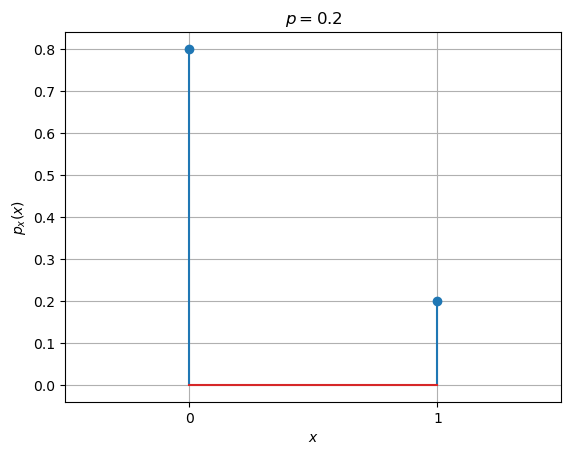

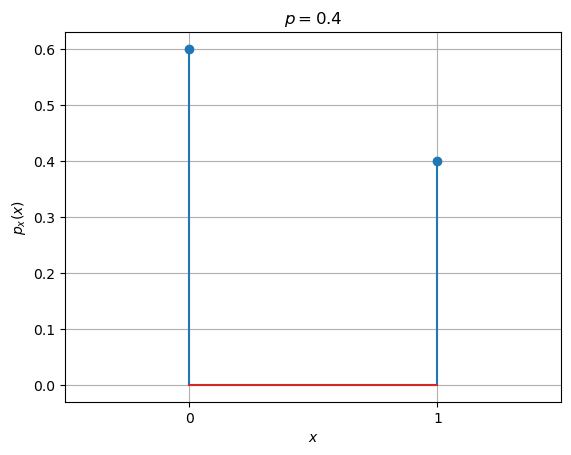

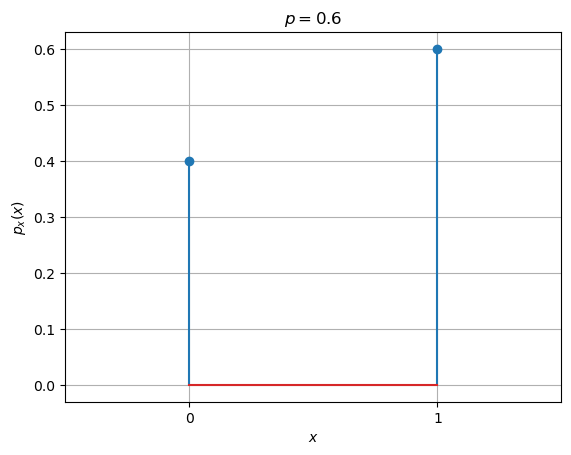

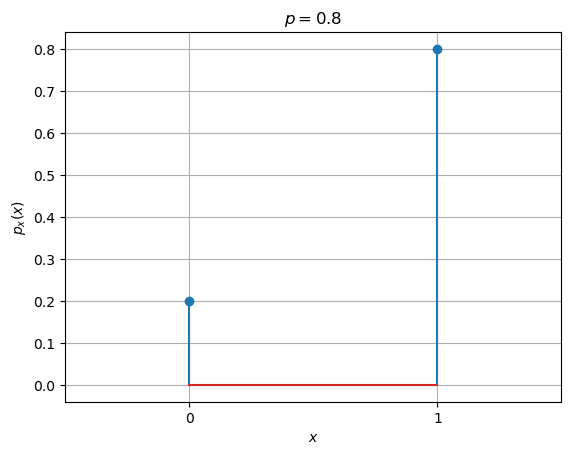

In [14]:
# Plot of the Bernoulli random variable
step = 1
x_bern = np.arange(0, 2, step)
probs = [0.2, 0.4, 0.6, 0.8]

for p in probs:
    plt.figure()
    plt.stem(x_bern, bernoulli(x_bern, p))
    plt.grid()
    plt.title(r'$p = $' + f'{p}')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.xticks([0,1])
    plt.xlim([-0.5,1.5])
    plt.show()

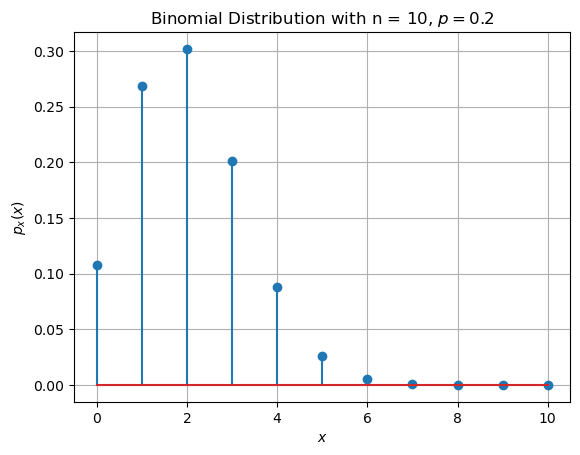

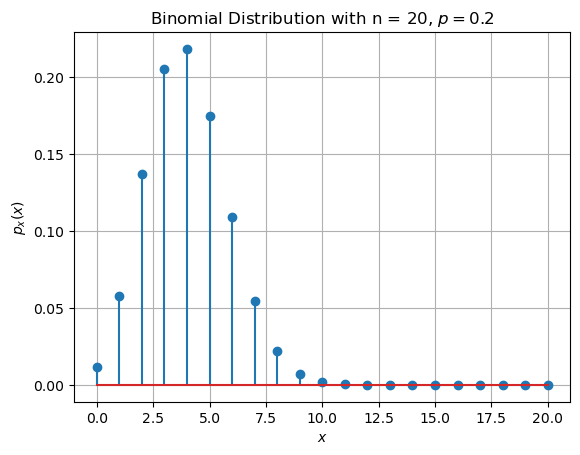

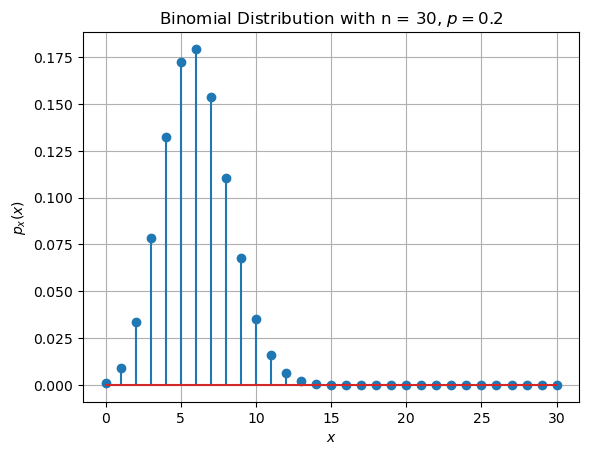

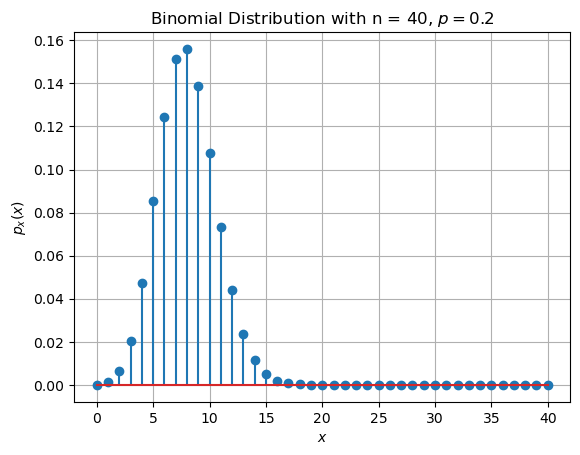

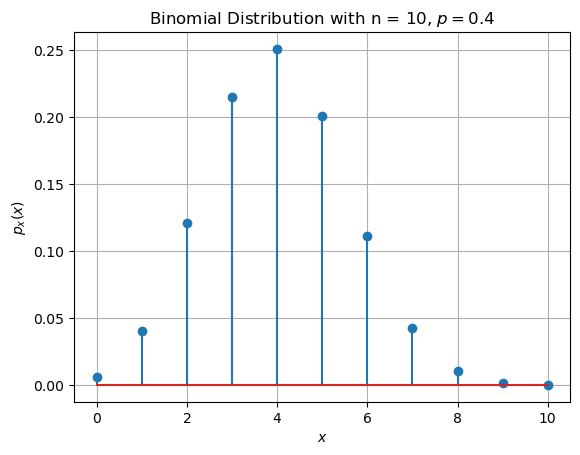

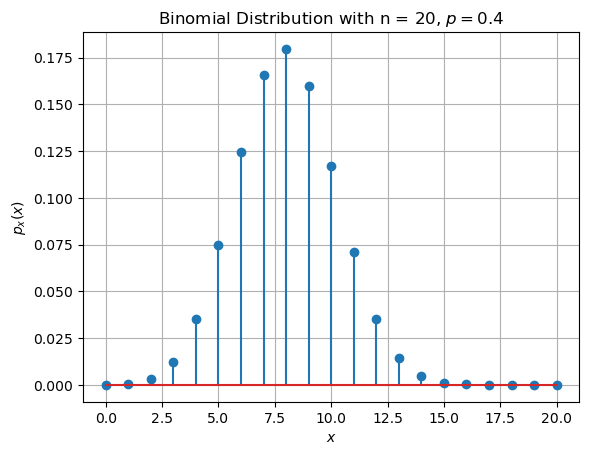

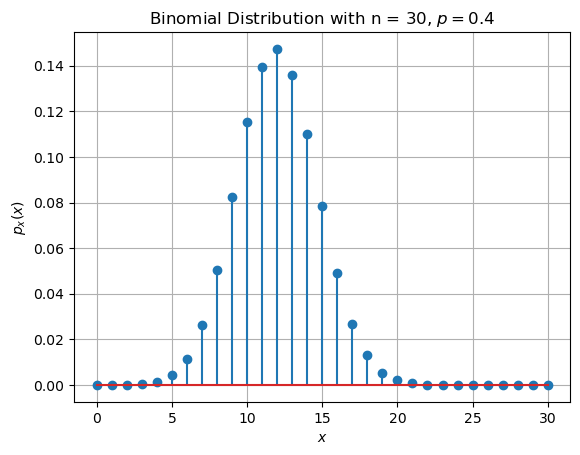

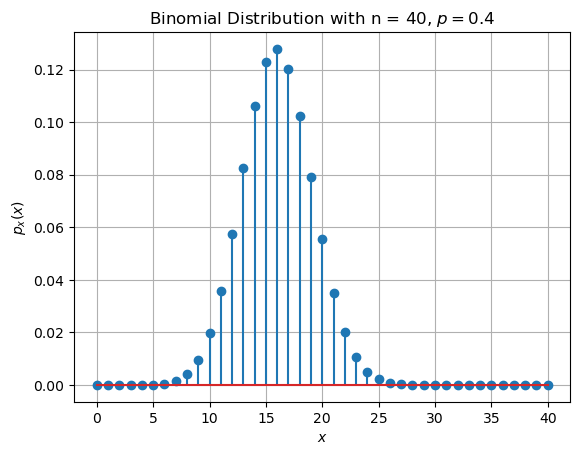

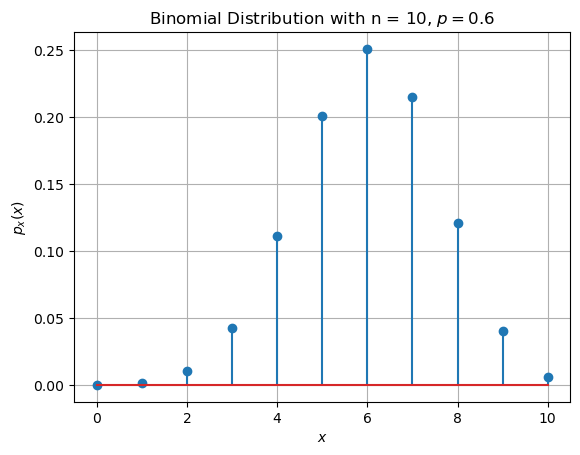

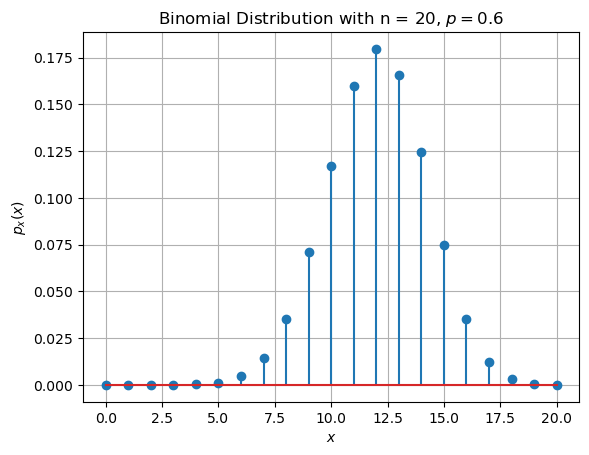

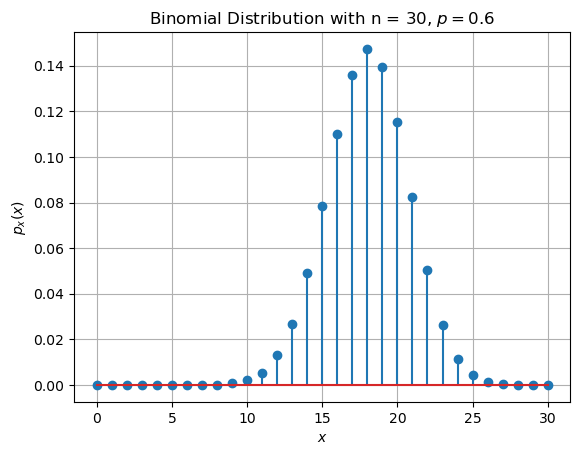

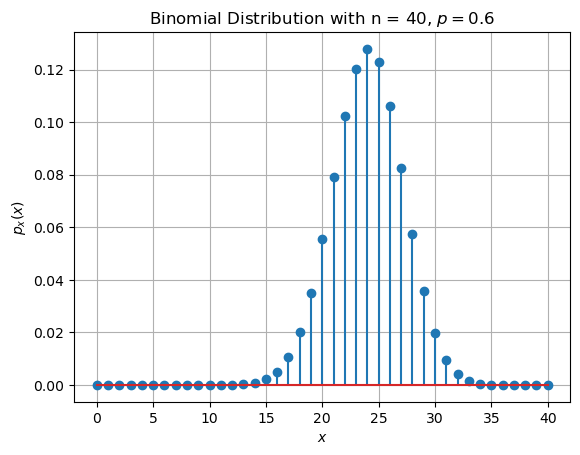

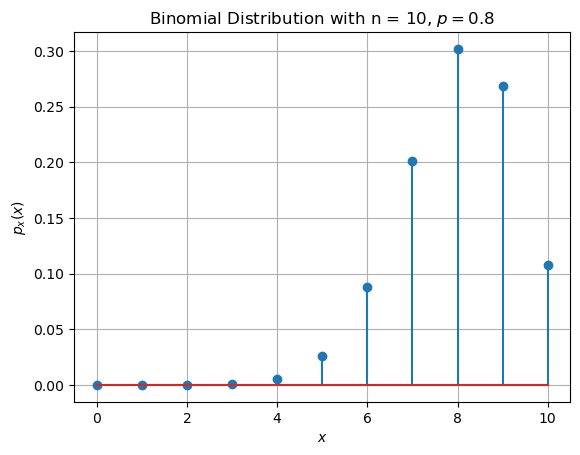

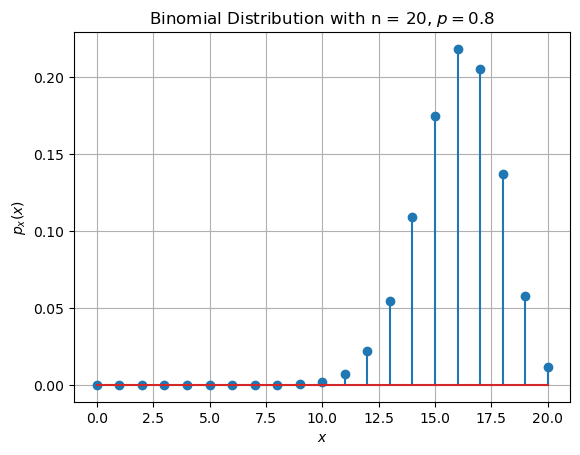

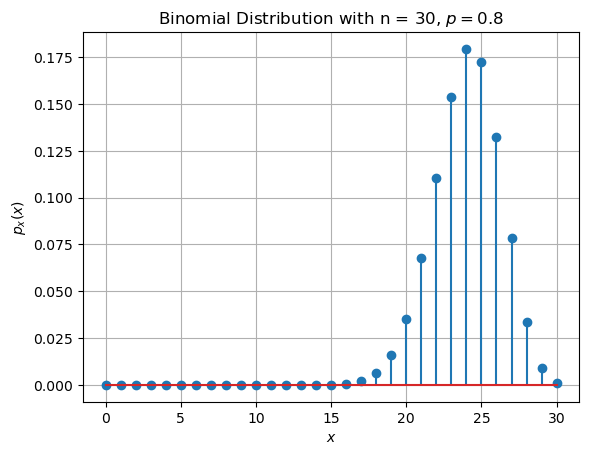

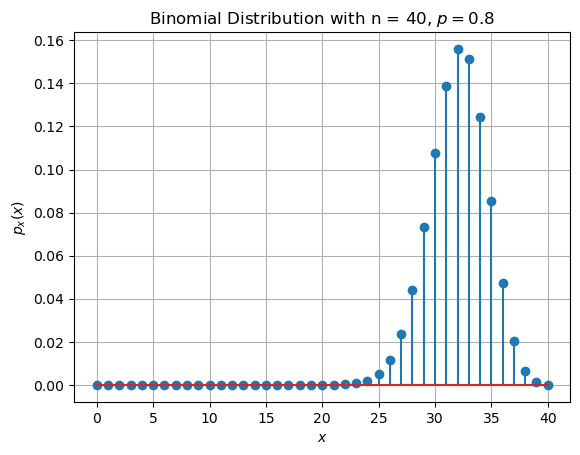

In [15]:
# Plot of the Binomial Random Variable
ks10 = []
for i in range(11):
    ks10.append(i)

ks20 = []
for i in range(21):
    ks20.append(i)

ks30 = []
for i in range(31):
    ks30.append(i)

ks40 = []
for i in range(41):
    ks40.append(i)

probs = [0.2, 0.4, 0.6, 0.8]
ns = [10, 20, 30, 40]

x_binom = []
for p in probs:
    for n in ns:
        if n == 10:
            plt.figure()
            plt.stem(ks10, binomial(n, ks10, p))
            plt.grid()
            plt.title(r'Binomial Distribution with' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.show()
        elif n == 20:
            plt.figure()
            plt.stem(ks20, binomial(n, ks20, p))
            plt.grid()
            plt.title(r'Binomial Distribution with' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.show()
        elif n == 30:
            plt.figure()
            plt.stem(ks30, binomial(n, ks30, p))
            plt.grid()
            plt.title(r'Binomial Distribution with' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.show()
        elif n == 40:
            plt.figure()
            plt.stem(ks40, binomial(n, ks40, p))
            plt.grid()
            plt.title(r'Binomial Distribution with' + f' n = {n}, ' + r'$p = $' + f'{p}')
            plt.xlabel(r'$x$')
            plt.ylabel(r'$p_x(x)$')
            plt.show()


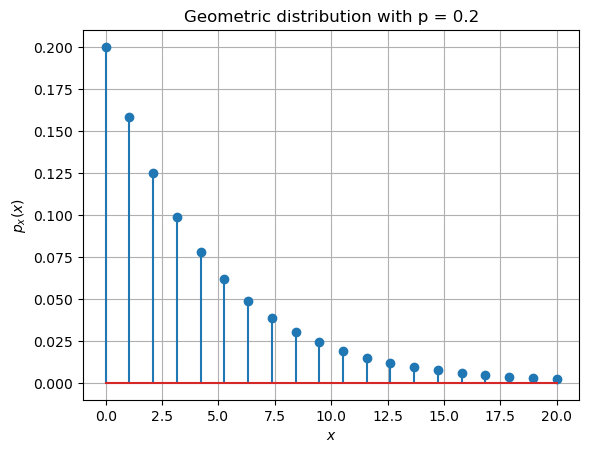

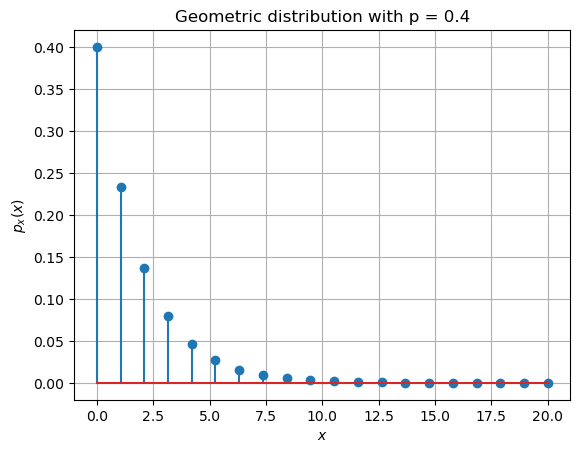

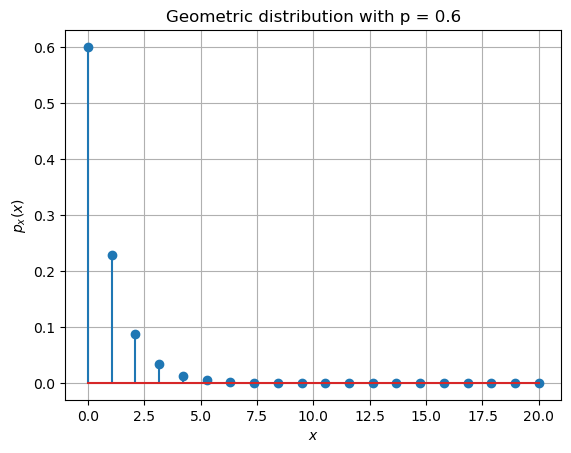

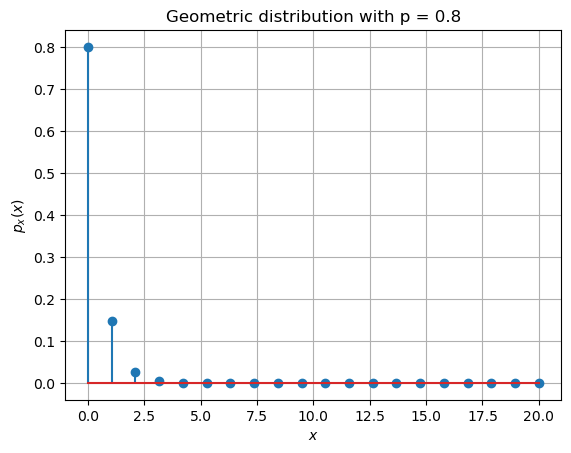

In [16]:
# Plots of the geometric random variable
x = np.linspace(0, 20, num=20)
probs = [0.2, 0.4, 0.6, 0.8]

for p in probs:
    plt.figure()
    plt.stem(x, geometric(p, x))
    plt.grid()
    plt.title(f'Geometric distribution with p = {p}')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.show()

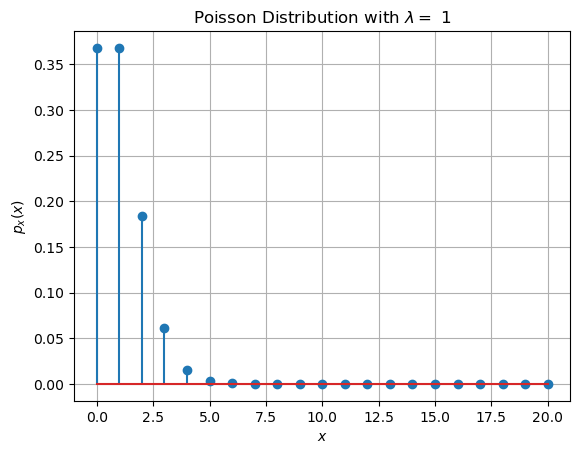

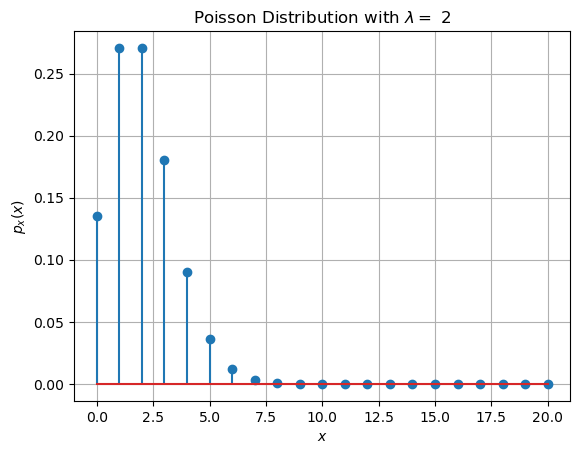

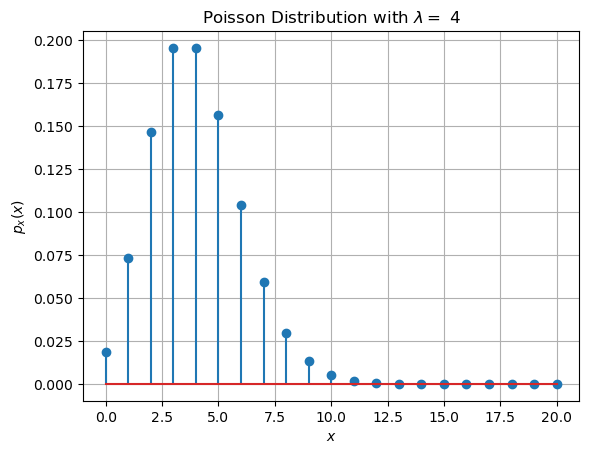

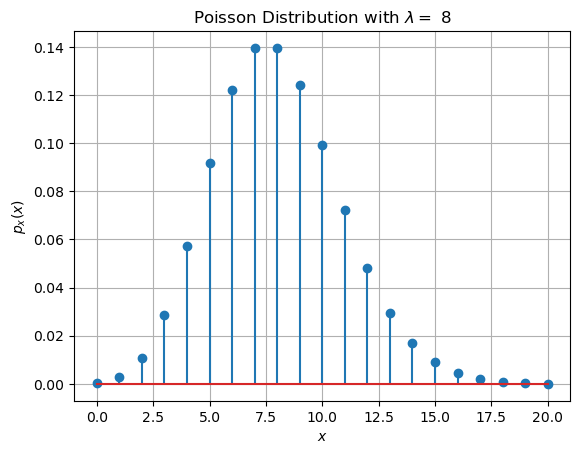

In [17]:
# Plots of the Poisson distribution
ks = list(range(21))
lambdas = [1, 2, 4, 8]

for l in lambdas:
    plt.figure()
    plt.stem(ks, poisson(l, ks))
    plt.grid()
    plt.title(f'Poisson Distribution with ' + r'$\lambda = $ ' + f'{l}')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.show()

### b) The file `dataRand.txt` contains the values of a random variable for 10000 repetitions of a random experiment. Of this random variable, it is only known that it can be Uniform, Geometric, or Poisson. Using this data, determine the relative frequency of each of the values ​​that this random variable takes.


In [18]:
# Data is exported from the .txt file
filename = 'dataRand.txt'
data = np.genfromtxt(filename, delimiter="   ", dtype=float)

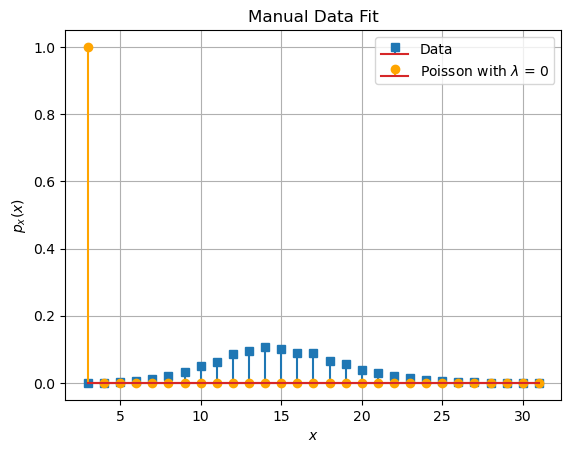

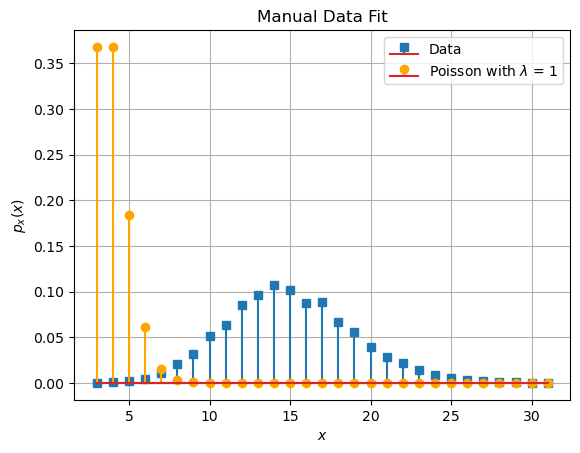

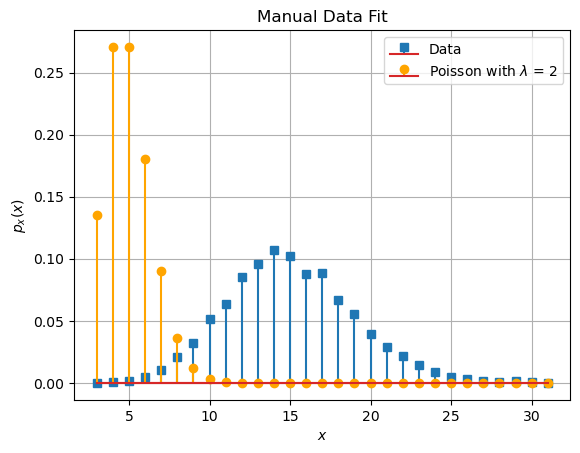

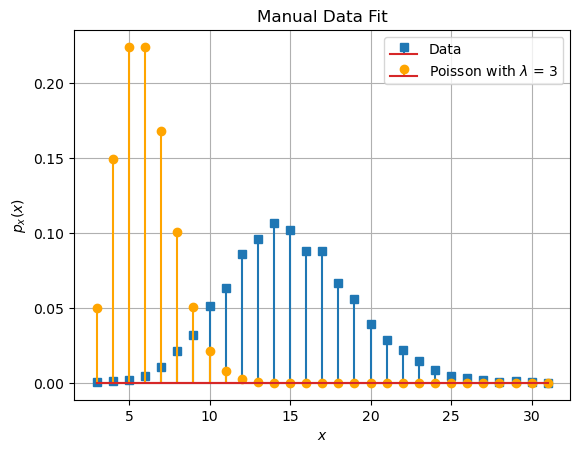

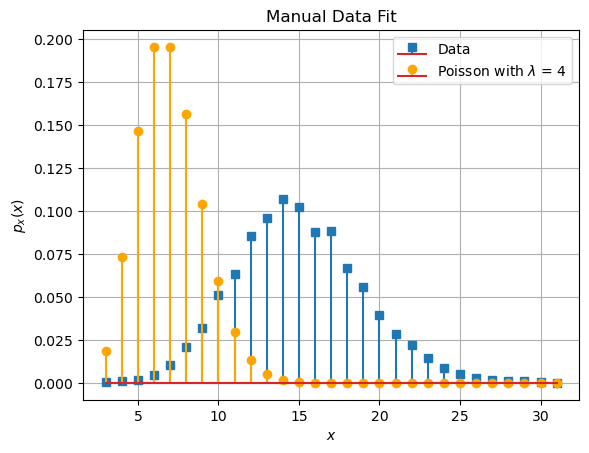

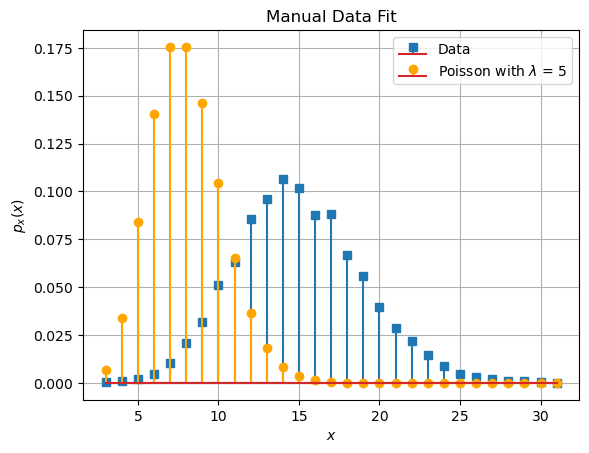

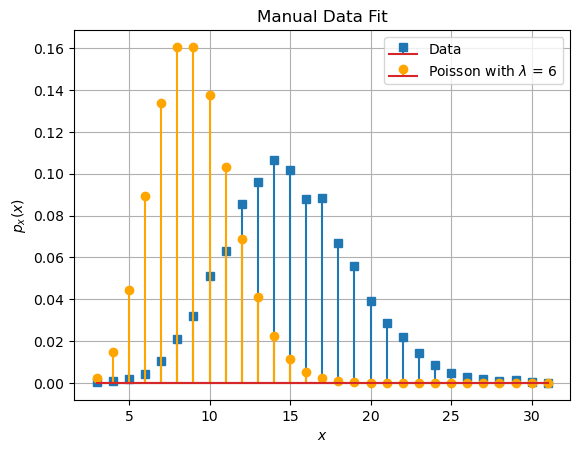

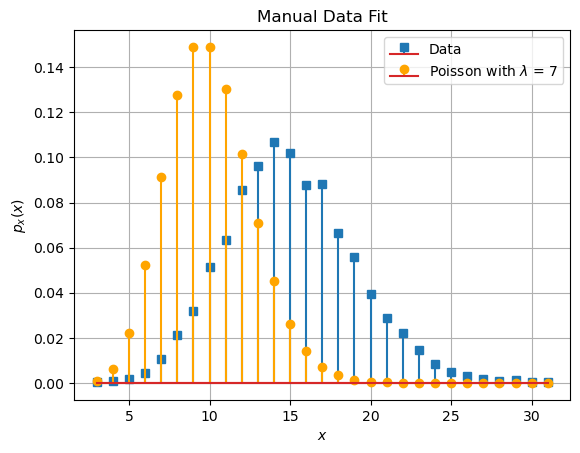

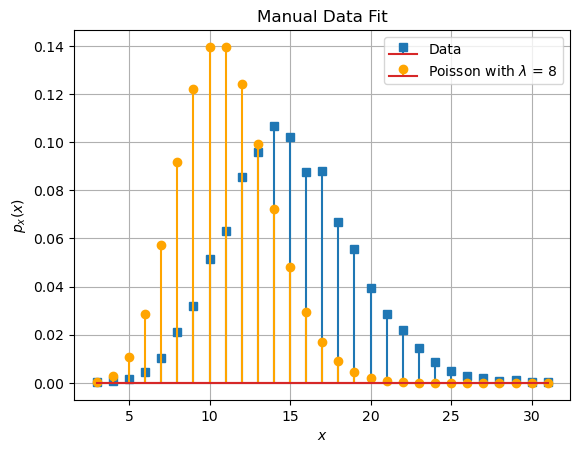

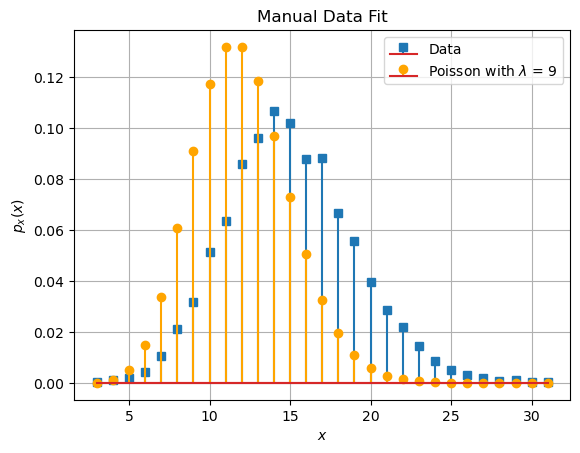

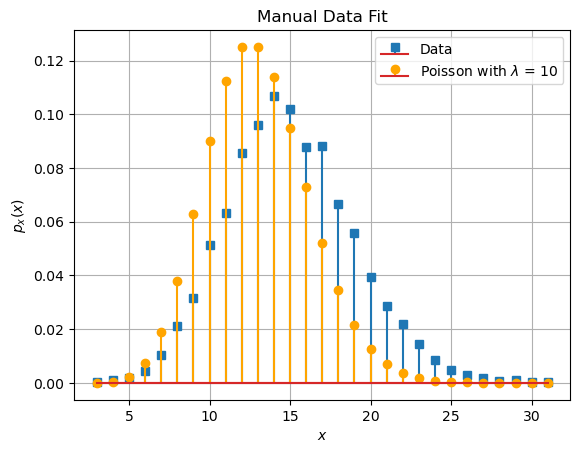

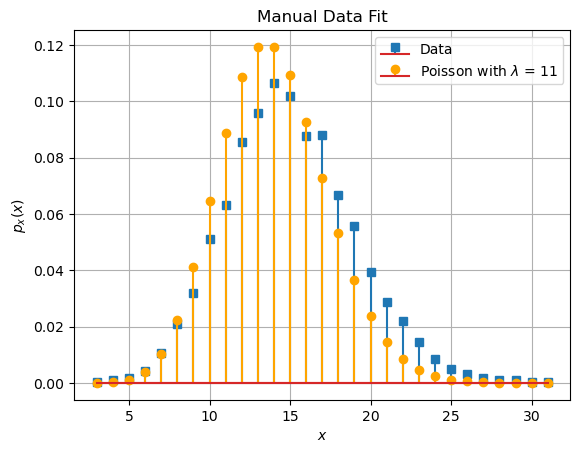

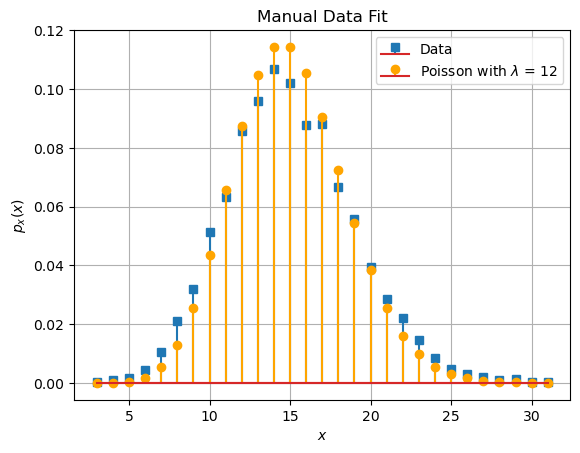

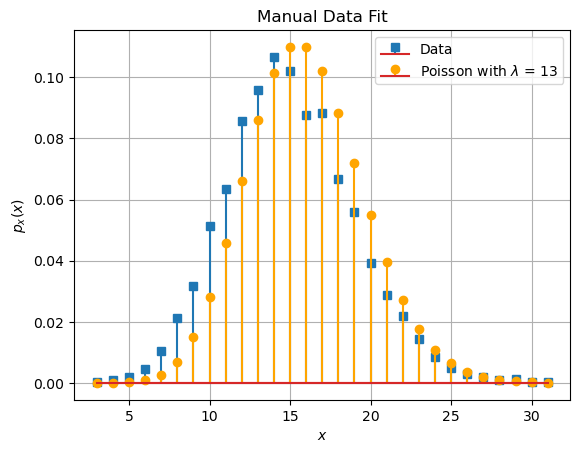

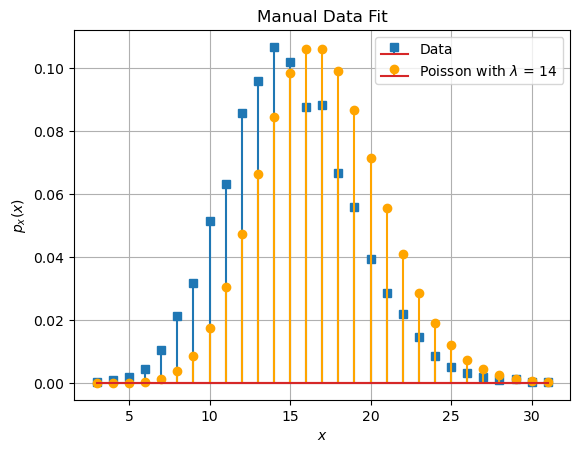

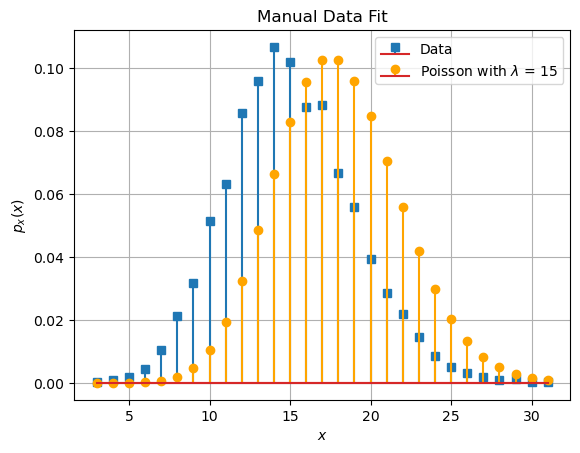

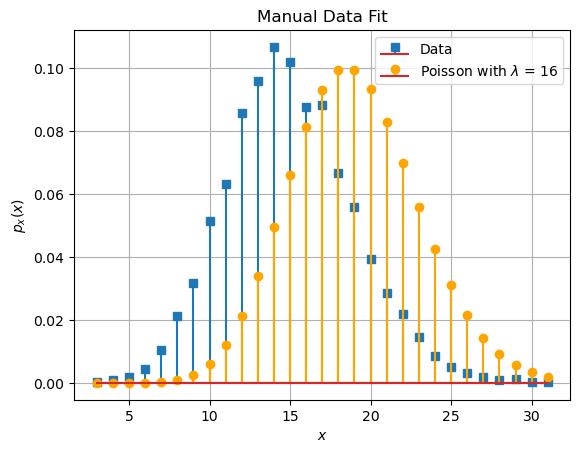

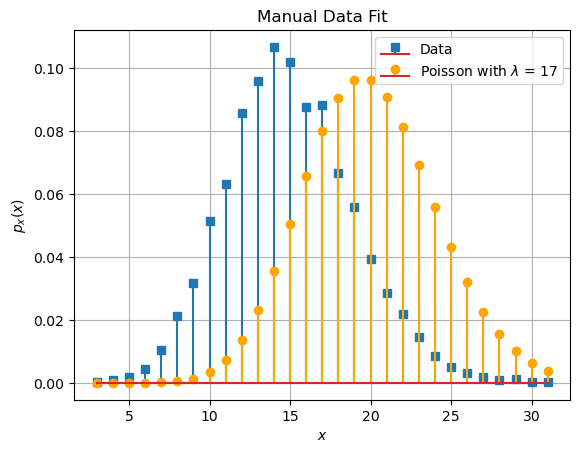

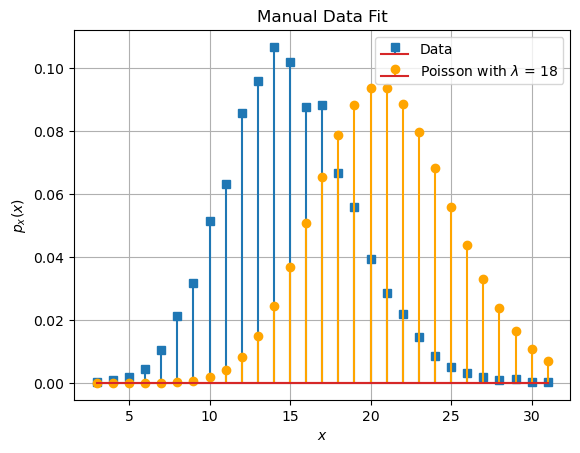

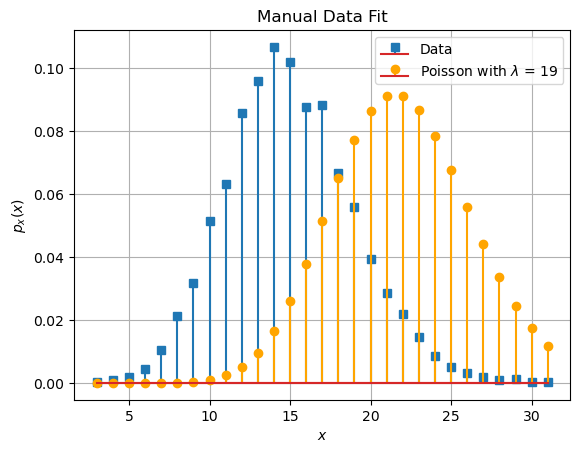

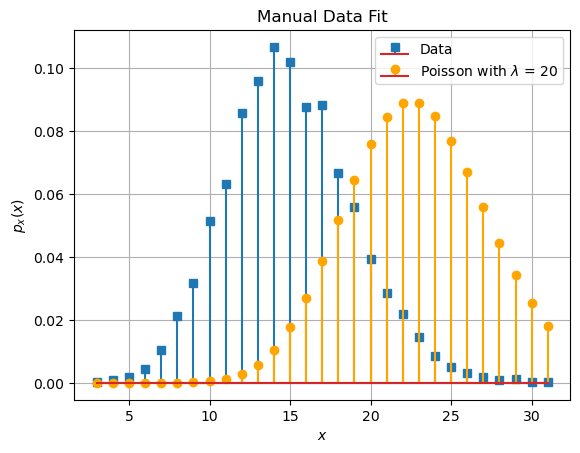

In [19]:
# Converting the list to a set removes duplicate values and leaves each value only once. This way we know which
# unique values are within the list.
# We convert the set back to a list because lists are cooler.
unique_values = list(set(data))

# Create a list to store the frequencies of each unique data value.
frequencies = []

for unique_value in unique_values:
    count = list(data).count(unique_value)
    frequencies.append(count/len(data))

for l in range(21):
    plt.figure()
    plt.stem(unique_values, frequencies, markerfmt='s')
    plt.stem(unique_values, poisson(l, unique_values), markerfmt='o', linefmt='orange')
    plt.grid()
    plt.title(f'Manual Data Fit')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$p_x(x)$')
    plt.legend(['Data', r'Poisson with $\lambda$ = '+ f'{l}'])
    plt.show()


We conclude that the data shown in `dataRand.txt` correpsonds to a Poisson distribution with $\lambda \approx 12$